<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Week3/Lesson1ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [2]:
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0ZHZCH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0ZHZCH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0ZHZCH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [36]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [37]:
tokenizer = info.features["text"].encoder
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [38]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_padded = train_dataset.padded_batch(BATCH_SIZE, padded_shapes=tf.compat.v1.data.get_output_shapes(train_dataset))
test_padded = test_dataset.padded_batch(BATCH_SIZE, padded_shapes=tf.compat.v1.data.get_output_shapes(test_dataset))

In [18]:
model = keras.models.Sequential([
    keras.layers.Embedding(tokenizer.vocab_size, 64),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_padded, epochs=30, validation_data=test_padded, verbose=1)

Epoch 1/30
391/391 [==============================] - 62s 158ms/step - loss: 0.5336 - accuracy: 0.7316 - val_loss: 0.4669 - val_accuracy: 0.8136
Epoch 2/30
391/391 [==============================] - 63s 161ms/step - loss: 0.3882 - accuracy: 0.8373 - val_loss: 0.6173 - val_accuracy: 0.6544
Epoch 3/30
391/391 [==============================] - 64s 164ms/step - loss: 0.3613 - accuracy: 0.8499 - val_loss: 0.3982 - val_accuracy: 0.8377
Epoch 4/30
391/391 [==============================] - 63s 161ms/step - loss: 0.2672 - accuracy: 0.8991 - val_loss: 0.4100 - val_accuracy: 0.8352
Epoch 5/30
391/391 [==============================] - 62s 159ms/step - loss: 0.2062 - accuracy: 0.9238 - val_loss: 0.4662 - val_accuracy: 0.8407
Epoch 6/30
391/391 [==============================] - 63s 160ms/step - loss: 0.1714 - accuracy: 0.9373 - val_loss: 0.4898 - val_accuracy: 0.8044
Epoch 7/30
391/391 [==============================] - 62s 159ms/step - loss: 0.1414 - accuracy: 0.9503 - val_loss: 0.5898 - val_ac

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()

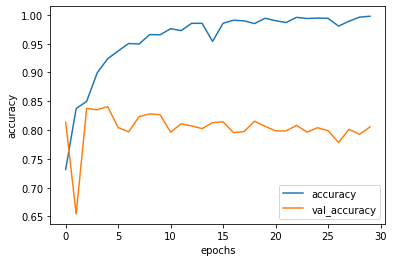

In [21]:
plot_graphs("accuracy")

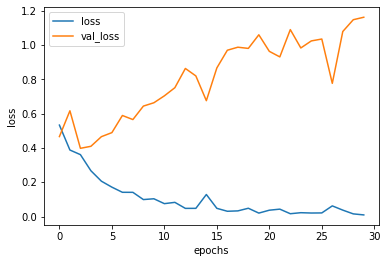

In [22]:
plot_graphs("loss")

In [42]:
model = keras.models.Sequential([
    keras.layers.Embedding(tokenizer.vocab_size, 64),
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 256)         197632    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 894,145
Trainable params: 894,145
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_padded, epochs=30, validation_data=test_padded, verbose=1)

Epoch 1/30
391/391 [==============================] - 133s 339ms/step - loss: 0.5938 - accuracy: 0.6724 - val_loss: 0.5627 - val_accuracy: 0.7618
Epoch 2/30
391/391 [==============================] - 133s 341ms/step - loss: 0.5518 - accuracy: 0.7188 - val_loss: 0.4653 - val_accuracy: 0.7926
Epoch 3/30
391/391 [==============================] - 133s 341ms/step - loss: 0.3279 - accuracy: 0.8626 - val_loss: 0.6958 - val_accuracy: 0.5288
Epoch 4/30
391/391 [==============================] - 134s 343ms/step - loss: 0.6170 - accuracy: 0.6856 - val_loss: 0.5982 - val_accuracy: 0.7264
Epoch 5/30
391/391 [==============================] - 134s 344ms/step - loss: 0.5164 - accuracy: 0.7604 - val_loss: 0.4915 - val_accuracy: 0.7997
Epoch 6/30
391/391 [==============================] - 134s 344ms/step - loss: 0.3511 - accuracy: 0.8540 - val_loss: 0.4098 - val_accuracy: 0.8084
Epoch 7/30
391/391 [==============================] - 135s 346ms/step - loss: 0.2825 - accuracy: 0.8891 - val_loss: 0.3702 -

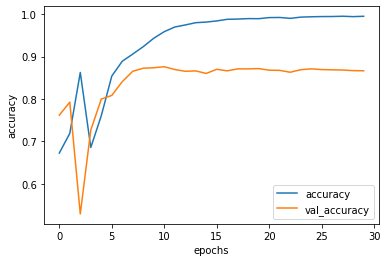

In [45]:
plot_graphs("accuracy")

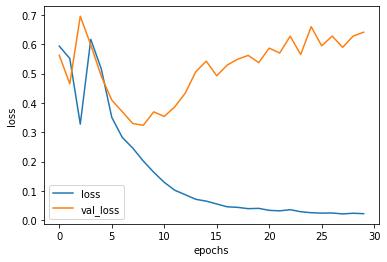

In [46]:
plot_graphs("loss")